# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [ ]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%load_ext memory_profiler

---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
def spare_matrix_Abt(m: int, n: int) -> tuple[np.ndarray, np.ndarray] | None:
    if not isinstance(m, int) or not isinstance(n, int):
        return None
    if m <= 0 or n <= 0:
        return None

    t = np.linspace(0, 1, m)
    A = np.vander(t, N=n, increasing=True)
    b = np.cos(4 * t)

    return A, b
    
"""Funkcja tworząca zestaw składający się z macierzy A (m,n) i
    wektora b (m,) na podstawie pomocniczego wektora t (m,).

    Args:
        m (int): Liczba wierszy macierzy A.
        n (int): Liczba kolumn macierzy A.

    Returns:
        (tuple[np.ndarray, np.ndarray]):
            - Macierz A o rozmiarze (m,n),
            - Wektor b (m,).
        Jeżeli dane wejściowe są niepoprawne funkcja zwraca `None`.
    """
  

'Funkcja tworząca zestaw składający się z macierzy A (m,n) i\n    wektora b (m,) na podstawie pomocniczego wektora t (m,).\n\n    Args:\n        m (int): Liczba wierszy macierzy A.\n        n (int): Liczba kolumn macierzy A.\n\n    Returns:\n        (tuple[np.ndarray, np.ndarray]):\n            - Macierz A o rozmiarze (m,n),\n            - Wektor b (m,).\n        Jeżeli dane wejściowe są niepoprawne funkcja zwraca `None`.\n    '

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [2]:
# ===== Twoja implementacja tutaj =====
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def square_from_rectan(A: np.ndarray, b: np.ndarray) -> tuple[np.ndarray, np.ndarray] | None:
    if not isinstance(A, np.ndarray) or not isinstance(b, np.ndarray):
        return None

    # Walidacja wymiarów A i b
    if A.ndim != 2 or b.ndim != 1:
        return None

    m, n = A.shape
    if b.shape[0] != m:
        return None

    try:
        A_new = A.T @ A
        b_new = A.T @ b
    except Exception:
        return None

    return A_new, b_new
    

In [3]:
# Przykładowa forma zestawienia wyników
print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(time[0])[:29]}")
print(f"Druga metoda    :  {str(time[1])[:29]}")
print(f"Trzecia metoda  :  {str(time[2])[:29]}")
print(f"Czwarta metoda  :  {str(time[3])[:29]}")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(memory[0])}")
print(f"Druga metoda    :  {str(memory[1])}")
print(f"Trzecia metoda  :  {str(memory[2])}")
print(f"Czwarta metoda  :  {str(memory[3])}")

Wyznaczona norma residuum dla kolejnych metod obliczeń:


NameError: name 'norm' is not defined

---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [4]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

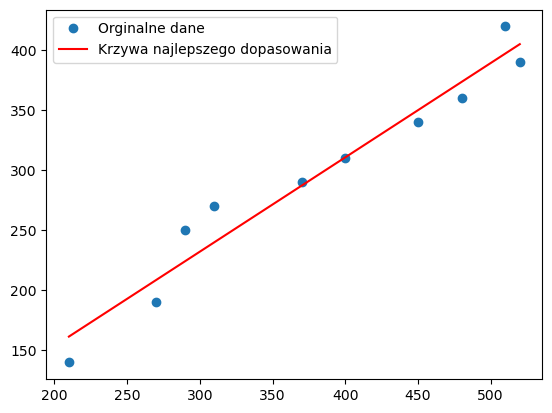

In [13]:
# ===== Twoja implementacja tutaj =====
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

res = sp.stats.linregress(d, w)
plt.plot(d, w, 'o', label = 'Orginalne dane')
plt.plot(d, res.intercept + res.slope*d, 'r', label='Krzywa najlepszego dopasowania')
plt.legend()
plt.show()


---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

===== Model 1: a + x1 =====
b[0] = 1.898891
b[1] = 1.014547
MSE = 1.118533373242109
R² = 0.48314841121525687
Residual norm = 10.57607381423801 

===== Model 2: a + x2 =====
b[0] = 1.987421
b[1] = -0.339605
MSE = 2.040661996378042
R² = 0.057051474518373224
Residual norm = 14.285174119968023 

===== Model 3: a + x1 + x2 =====
b[0] = 1.933140
b[1] = 1.066816
b[2] = -0.455714
MSE = 0.8989847965630432
R² = 0.5845973562235722
Residual norm = 9.481480878866144 

===== Model 4: a + x1 + x2 + x1*x2 =====
b[0] = 1.912322
b[1] = 1.071904
b[2] = -0.468365
b[3] = 0.177492
MSE = 0.8694193338003654
R² = 0.5982589570015211
Residual norm = 9.324265835980684 



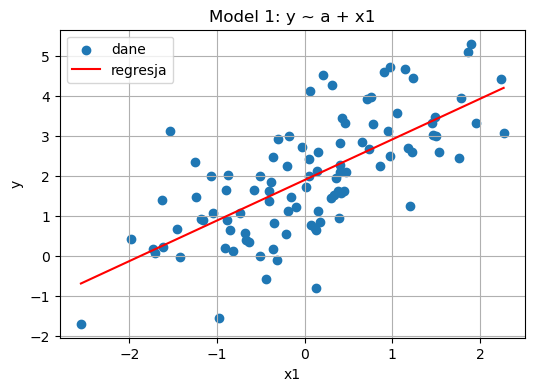

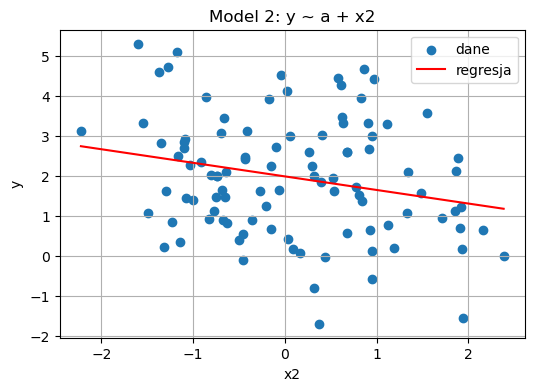

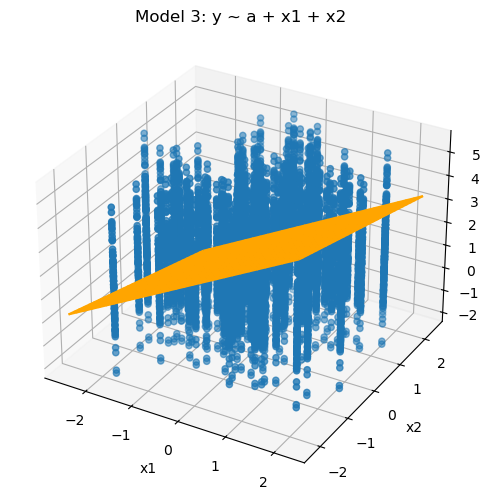

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def square_from_rectan(A: np.ndarray, b: np.ndarray):
    
    if not isinstance(A, np.ndarray) or not isinstance(b, np.ndarray):
        return None
    if A.ndim != 2:
        return None
    if b.ndim not in (1, 2):
        return None

    m, n = A.shape

    if b.ndim == 2:
        if b.shape != (m, 1):
            return None
        b_vec = b.ravel()
    else:
        if b.shape[0] != m:
            return None
        b_vec = b

    try:
        A_new = A.T @ A
        b_new = A.T @ b_vec
    except:
        return None

    return A_new, b_new


def residual_norm(A: np.ndarray, x: np.ndarray, b: np.ndarray):
    
    if not isinstance(A, np.ndarray) or not isinstance(x, np.ndarray) or not isinstance(b, np.ndarray):
        return None
    if A.ndim != 2 or x.ndim != 1:
        return None
    m, n = A.shape
    if x.shape[0] != n:
        return None
    if b.ndim == 2:
        if b.shape != (m, 1):
            return None
        b_vec = b.ravel()
    elif b.ndim == 1:
        if b.shape[0] != m:
            return None
        b_vec = b
    else:
        return None

    r = A @ x - b_vec
    return float(np.linalg.norm(r))


np.random.seed(0)

x1 = np.random.normal(0, 1, (100, 1))
x2 = np.random.normal(0, 1, (100, 1))
e  = np.random.normal(0, 1, (100, 1))

y = 2 + x1 - 0.5 * x2 + e
y = y.ravel()



def qr_regression(Z, y):
    Q, R = np.linalg.qr(Z)
    rhs = Q.T @ y
    b = np.linalg.solve(R, rhs)
    y_hat = Z @ b

    
    residual = y - y_hat
    mse = float(np.mean(residual ** 2))
    ss_res = float(np.sum(residual ** 2))
    ss_tot = float(np.sum((y - np.mean(y)) ** 2))
    r2 = 1 - ss_res / ss_tot
    rn = residual_norm(Z, b, y)

    return b, y_hat, {"mse": mse, "r2": r2, "residual_norm": rn}



n = len(y)


Z1 = np.concatenate([np.ones((n, 1)), x1], axis=1)
b1, y1_hat, m1 = qr_regression(Z1, y)


Z2 = np.concatenate([np.ones((n, 1)), x2], axis=1)
b2, y2_hat, m2 = qr_regression(Z2, y)


Z3 = np.concatenate([np.ones((n, 1)), x1, x2], axis=1)
b3, y3_hat, m3 = qr_regression(Z3, y)

x1x2 = x1 * x2
Z4 = np.concatenate([np.ones((n, 1)), x1, x2, x1x2], axis=1)
b4, y4_hat, m4 = qr_regression(Z4, y)



def show_results(model_name, b, metrics):
    print(f"===== {model_name} =====")
    for i, val in enumerate(b):
        print(f"b[{i}] = {val:.6f}")
    print("MSE =", metrics["mse"])
    print("R² =", metrics["r2"])
    print("Residual norm =", metrics["residual_norm"], "\n")


show_results("Model 1: a + x1", b1, m1)
show_results("Model 2: a + x2", b2, m2)
show_results("Model 3: a + x1 + x2", b3, m3)
show_results("Model 4: a + x1 + x2 + x1*x2", b4, m4)



plt.figure(figsize=(6,4))
plt.scatter(x1, y, label="dane")
xs = np.linspace(np.min(x1), np.max(x1), 100)
plt.plot(xs, b1[0] + b1[1] * xs, label="regresja", color="red")
plt.title("Model 1: y ~ a + x1")
plt.xlabel("x1")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()


plt.figure(figsize=(6,4))
plt.scatter(x2, y, label="dane")
xs = np.linspace(np.min(x2), np.max(x2), 100)
plt.plot(xs, b2[0] + b2[1] * xs, label="regresja", color="red")
plt.title("Model 2: y ~ a + x2")
plt.xlabel("x2")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y)

x1g, x2g = np.meshgrid(
    np.linspace(np.min(x1), np.max(x1), 30),
    np.linspace(np.min(x2), np.max(x2), 30)
)
yg = b3[0] + b3[1]*x1g + b3[2]*x2g

ax.plot_wireframe(x1g, x2g, yg, color="orange")
ax.set_title("Model 3: y ~ a + x1 + x2")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()



---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)